CRM Sales Opportunities
B2B sales pipeline data from a fictitious company that sells computer hardware, including information on accounts, products, sales teams, and sales opportunities.

Recommended Analysis
How is each sales team performing compared to the rest?

Are any sales agents lagging behind?

Can you identify any quarter-over-quarter trends?

Do any products have better win rates?

(Source: data.world)

(License: Public Domain)

(Dataset 
Downloaded from Maven Analytics)

In [171]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

In [125]:
a=pd.read_csv('accounts.csv')
st=pd.read_csv('sales_teams.csv')
sp=pd.read_csv('sales_pipeline.csv')
p=pd.read_csv('products.csv')




Exploring data

In [126]:
a.head()

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [127]:
a['subsidiary_of'].unique()

array([nan, 'Acme Corporation', 'Massive Dynamic', 'Bubba Gump', 'Inity',
       'Sonron', 'Golddex', 'Warephase'], dtype=object)

In [128]:
a['subsidiary_of']=a['subsidiary_of'].fillna('Missing Data')

In [129]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     85 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [130]:
a.duplicated().sum()

0

In [131]:
a.describe()

,year_established,revenue,employees
count,85.000000,85.000000,85.000000
mean,1996.105882,1994.632941,4660.823529
std,8.865427,2169.491436,5715.601198
min,1979.000000,4.540000,9.000000
25%,1989.000000,497.110000,1179.000000
50%,1996.000000,1223.720000,2769.000000
75%,2002.000000,2741.370000,5595.000000
max,2017.000000,11698.030000,34288.000000


In [132]:
p.head()

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [133]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [134]:
p.describe()

,sales_price
count,7.000000
mean,6023.571429
std,9388.428070
min,55.000000
25%,823.000000
50%,3393.000000
75%,5151.500000
max,26768.000000


In [135]:
p.head(7)

,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482
5,GTX Plus Basic,GTX,1096
6,GTK 500,GTK,26768


In [136]:
st.head()

,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [137]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 968.0+ bytes


In [138]:
st.duplicated().sum()

0

In [139]:
st.describe(include='object')

,sales_agent,manager,regional_office
count,35,35,35
unique,35,6,3
top,Anna Snelling,Melvin Marxen,East
freq,1,6,12


In [140]:
sp.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [141]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [142]:
sp.duplicated().sum()

0

In [143]:
sp.tail(10)

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
8790,FCNN6UY0,Versie Hillebrand,MG Advanced,Ganjaflex,Prospecting,NaN,NaN,NaN
8791,8M2O0Q8V,Versie Hillebrand,MG Advanced,Silis,Prospecting,NaN,NaN,NaN
8792,WNWI8RJU,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8793,4H6DFFO4,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8794,IUM2FVA1,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8799,8I5ONXJX,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


How is each sales team performing compared to the rest?

In [144]:
m=st[['sales_agent','manager','regional_office']]

In [145]:
m=pd.merge(sp,m, how='left',on='sales_agent')

In [146]:
m.groupby(['regional_office','manager']).agg({'close_value':'sum','account':'nunique','opportunity_id':'nunique','product':'nunique'}).sort_values(by=['close_value'],ascending=False).reset_index()

,regional_office,manager,close_value,account,opportunity_id,product
0,Central,Melvin Marxen,2251930.0,75,1929,7
1,West,Summer Sewald,1964750.0,72,1701,6
2,East,Rocco Neubert,1960545.0,60,1327,6
3,West,Celia Rouche,1603897.0,68,1296,7
4,East,Cara Losch,1130049.0,64,964,7
5,Central,Dustin Brinkmann,1094363.0,74,1583,5


Are any sales agents lagging behind?

In [147]:
check=sp.groupby(['sales_agent']).agg({'close_value':'sum','account':'nunique','opportunity_id':'nunique','product':'nunique'}).sort_values(by=['close_value'],ascending=True).reset_index()

In [148]:
print('Sales agents who have less than qarter of sales of other sales agents')
check[check['close_value']<check['close_value'].quantile(0.25)]

Sales agents who have less than qarter of sales of other sales agents


,sales_agent,close_value,account,opportunity_id,product
0,Violet Mclelland,123431.0,44,261,6
1,Wilburn Farren,157640.0,28,110,6
2,Niesha Huffines,176961.0,44,239,6
3,Versie Hillebrand,187693.0,47,361,5
4,Lajuana Vencill,194632.0,41,311,5
5,Garret Kinder,197773.0,30,123,6
6,Moses Frase,207182.0,41,260,5
7,Cecily Lampkin,229800.0,34,203,5


In [149]:
Do any products have better win rates?

Object `rates` not found.


In [ ]:
Do any products have better win rates

In [150]:
df1=m[m['deal_stage']=='Won'].groupby('product')['deal_stage'].count().sort_values(ascending=False).reset_index(name='Wins')

In [151]:
df1['Win_Rate']=df1.Wins/df1.Wins.sum()*100

In [152]:
df1

,product,Wins,Win_Rate
0,GTX Basic,915,21.590373
1,MG Special,793,18.711656
2,GTXPro,729,17.201510
3,MG Advanced,654,15.431807
4,GTX Plus Basic,653,15.408211
5,GTX Plus Pro,479,11.302501
6,GTK 500,15,0.353941


Can you identify any quarter-over-quarter trends?

In [155]:
sp['quarter']=pd.to_datetime(sp.close_date).dt.quarter

In [156]:
sp['year']=pd.to_datetime(sp.close_date).dt.year

In [157]:
sp.head()

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,quarter,year
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,1.0,2017.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,1.0,2017.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,1.0,2017.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,1.0,2017.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,1.0,2017.0


In [164]:
n=sp.groupby(['year','quarter']).agg({'close_value':'sum','account':'nunique','opportunity_id':'nunique','product':'nunique'}).sort_values(by=['year','quarter'],ascending=[True,True]).reset_index()

In [165]:
n

,year,quarter,close_value,account,opportunity_id,product
0,2017.0,1.0,1134672.0,85,647,7
1,2017.0,2.0,3086111.0,85,2032,7
2,2017.0,3.0,2982255.0,85,2047,7
3,2017.0,4.0,2802496.0,85,1985,7


<AxesSubplot:xlabel='quarter', ylabel='close_value'>

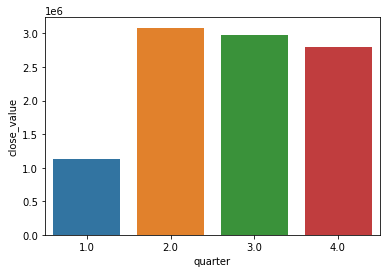

In [170]:
sns.barplot(x='quarter',y='close_value',data=n)

Text(0, 0.5, 'opportunities')

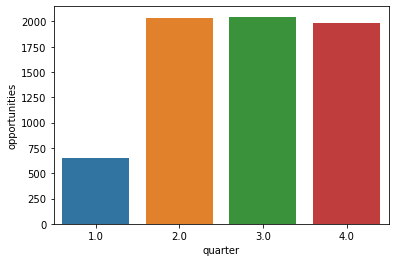

In [172]:
sns.barplot(x='quarter',y='opportunity_id',data=n)
plt.ylabel('opportunities')